In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support


In [206]:
df_path = "Grades.csv"
df = pd.read_csv(df_path)
df.head()


university sex  age address  motherEducation  fatherEducation motherJob  \
0         PR   F   18       U                4                4   at_home   
1         PR   F   17       U                1                1   at_home   
2         PR   F   15       U                1                1   at_home   
3         PR   F   15       U                4                2    health   
4         PR   F   16       U                3                3     other   

  fatherJob  reason  travelTime  ...  internet  romantic freeTime goOut Dalc  \
0   teacher  course           2  ...        no        no        3     4    1   
1     other  course           1  ...       yes        no        3     3    1   
2     other   other           1  ...       yes        no        3     2    2   
3  services    home           1  ...       yes       yes        2     2    1   
4     other    home           1  ...        no        no        3     2    1   

  Walc absences  EPSGrade  DSGrade  finalGrade  
0    1        6         5        6           6  
1    1        4         5        5           6  
2    3       10         7        8          10  
3    1        2        15       14          15  
4    2        4         6       10          10  

[5 rows x 25 columns]

In [207]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   university         397 non-null    object
 1   sex                397 non-null    object
 2   age                397 non-null    int64 
 3   address            397 non-null    object
 4   motherEducation    397 non-null    int64 
 5   fatherEducation    397 non-null    int64 
 6   motherJob          397 non-null    object
 7   fatherJob          397 non-null    object
 8   reason             397 non-null    object
 9   travelTime         397 non-null    int64 
 10  studyTime          397 non-null    int64 
 11  failures           397 non-null    int64 
 12  universitySupport  397 non-null    object
 13  paid               397 non-null    object
 14  higher             397 non-null    object
 15  internet           397 non-null    object
 16  romantic           397 non-null    object
 1

In [208]:
df.describe()


age  motherEducation  fatherEducation  travelTime   studyTime  \
count  397.000000       397.000000       397.000000  397.000000  397.000000   
mean    16.705290         2.748111         2.521411    1.450882    2.032746   
std      1.279716         1.097301         1.090672    0.696840    0.838731   
min     15.000000         0.000000         0.000000    1.000000    1.000000   
25%     16.000000         2.000000         2.000000    1.000000    1.000000   
50%     17.000000         3.000000         2.000000    1.000000    2.000000   
75%     18.000000         4.000000         3.000000    2.000000    2.000000   
max     22.000000         4.000000         4.000000    4.000000    4.000000   

         failures    freeTime       goOut        Dalc        Walc    absences  \
count  397.000000  397.000000  397.000000  397.000000  397.000000  397.000000   
mean     0.335013    3.234257    3.108312    1.478589    2.289673    5.695214   
std      0.742714    0.996476    1.112762    0.889143    1.286770    7.988015   
min      0.000000    1.000000    1.000000    1.000000    1.000000    0.000000   
25%      0.000000    3.000000    2.000000    1.000000    1.000000    0.000000   
50%      0.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      0.000000    4.000000    4.000000    2.000000    3.000000    8.000000   
max      3.000000    5.000000    5.000000    5.000000    5.000000   75.000000   

         EPSGrade     DSGrade  finalGrade  
count  397.000000  397.000000  397.000000  
mean    10.881612   10.687657   10.377834  
std      3.333120    3.770322    4.604928  
min      3.000000    0.000000    0.000000  
25%      8.000000    9.000000    8.000000  
50%     11.000000   11.000000   11.000000  
75%     13.000000   13.000000   14.000000  
max     19.000000   19.000000   20.000000

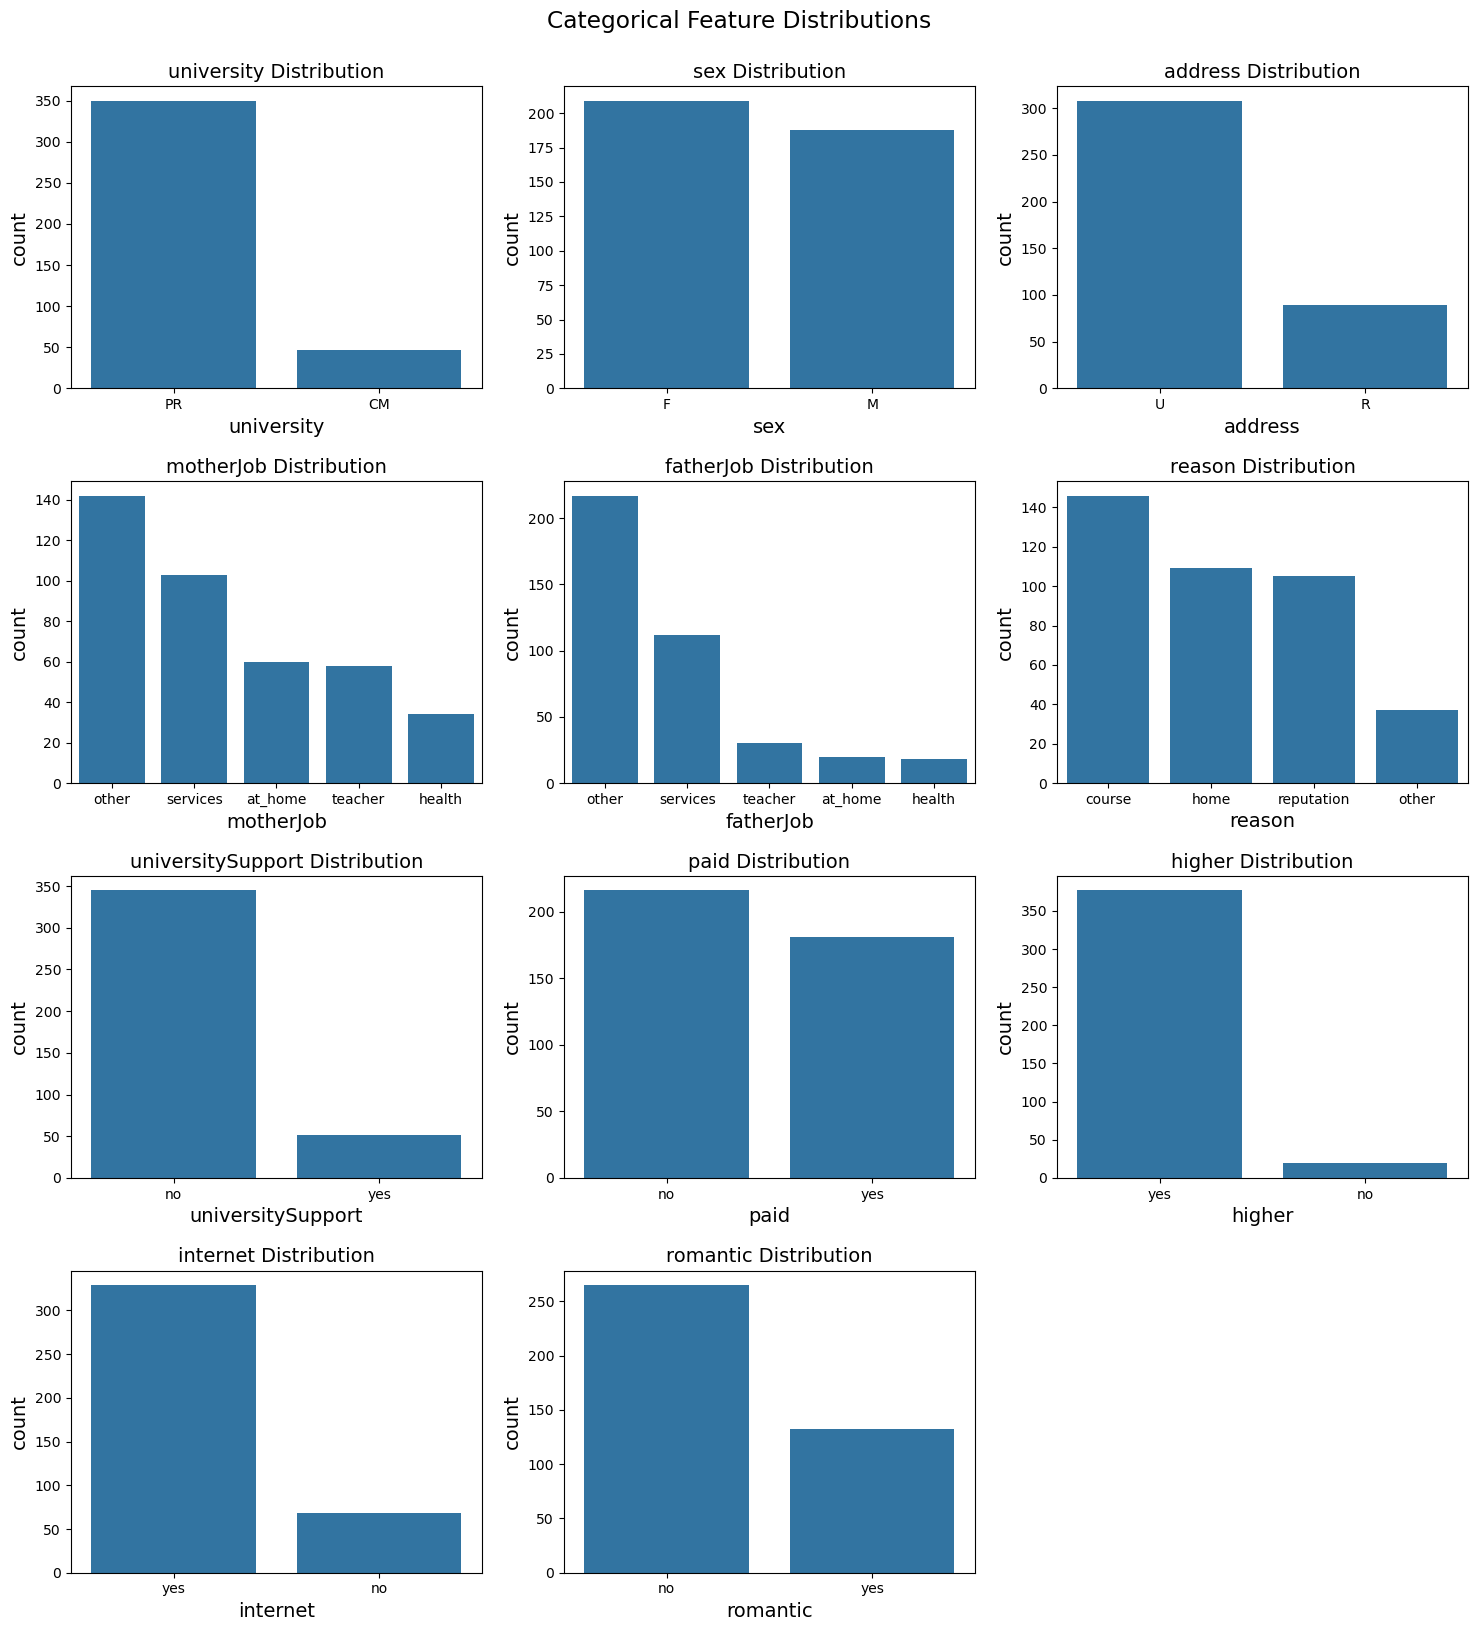

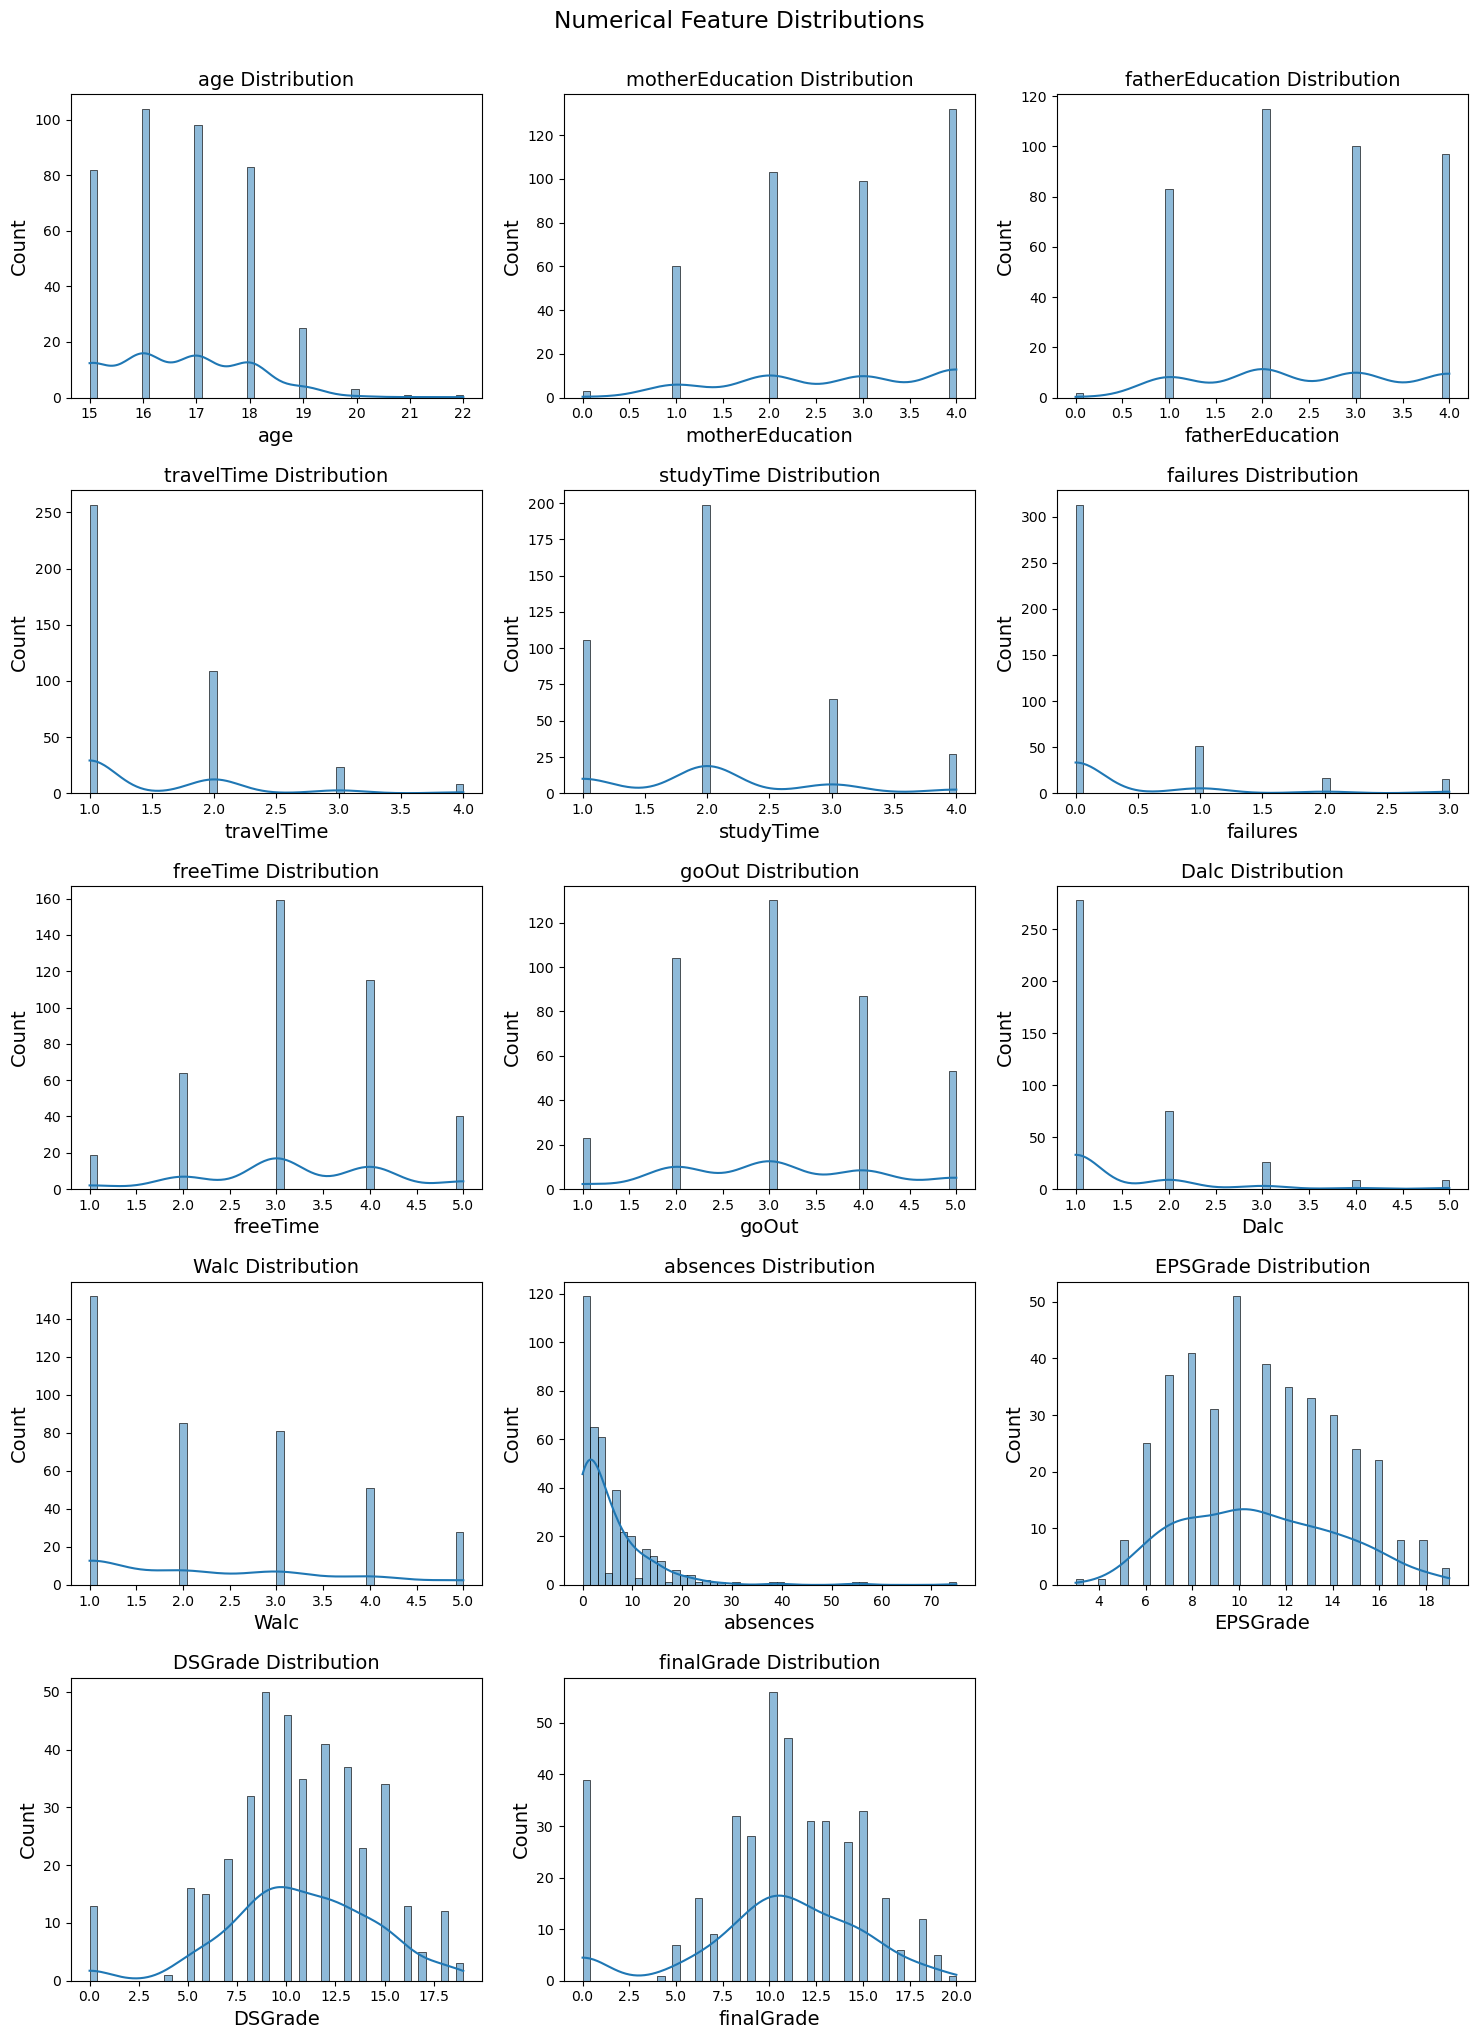

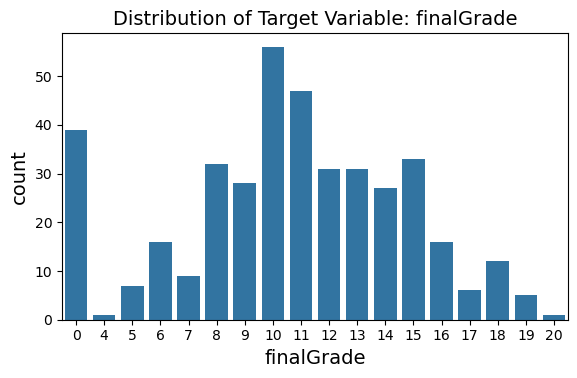

In [209]:
categorical_cols = df.select_dtypes(include=['object']).columns
n_cat = len(categorical_cols)
cat_cols_per_row = 3
rows_cat = (n_cat + cat_cols_per_row - 1) // cat_cols_per_row
fig, axes = plt.subplots(rows_cat, cat_cols_per_row, figsize=(5 * cat_cols_per_row, 4 * rows_cat))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts(dropna=False).index, ax=axes[i])
    axes[i].set_title(f"{col} Distribution")
    axes[i].tick_params(axis='x')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.suptitle("Categorical Feature Distributions", y=1.02)
plt.show()

numeric_cols = df.select_dtypes(include=["number"]).columns
n_num = len(numeric_cols)
num_cols_per_row = 3
rows_num = (n_num + num_cols_per_row - 1) // num_cols_per_row
fig, axes = plt.subplots(rows_num, num_cols_per_row, figsize=(5 * num_cols_per_row, 4 * rows_num))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=50, ax=axes[i])
    axes[i].set_title(f"{col} Distribution")
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.suptitle("Numerical Feature Distributions", y=1.02)
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=df['finalGrade'])
plt.title("Distribution of Target Variable: finalGrade")
plt.tight_layout()
plt.show()

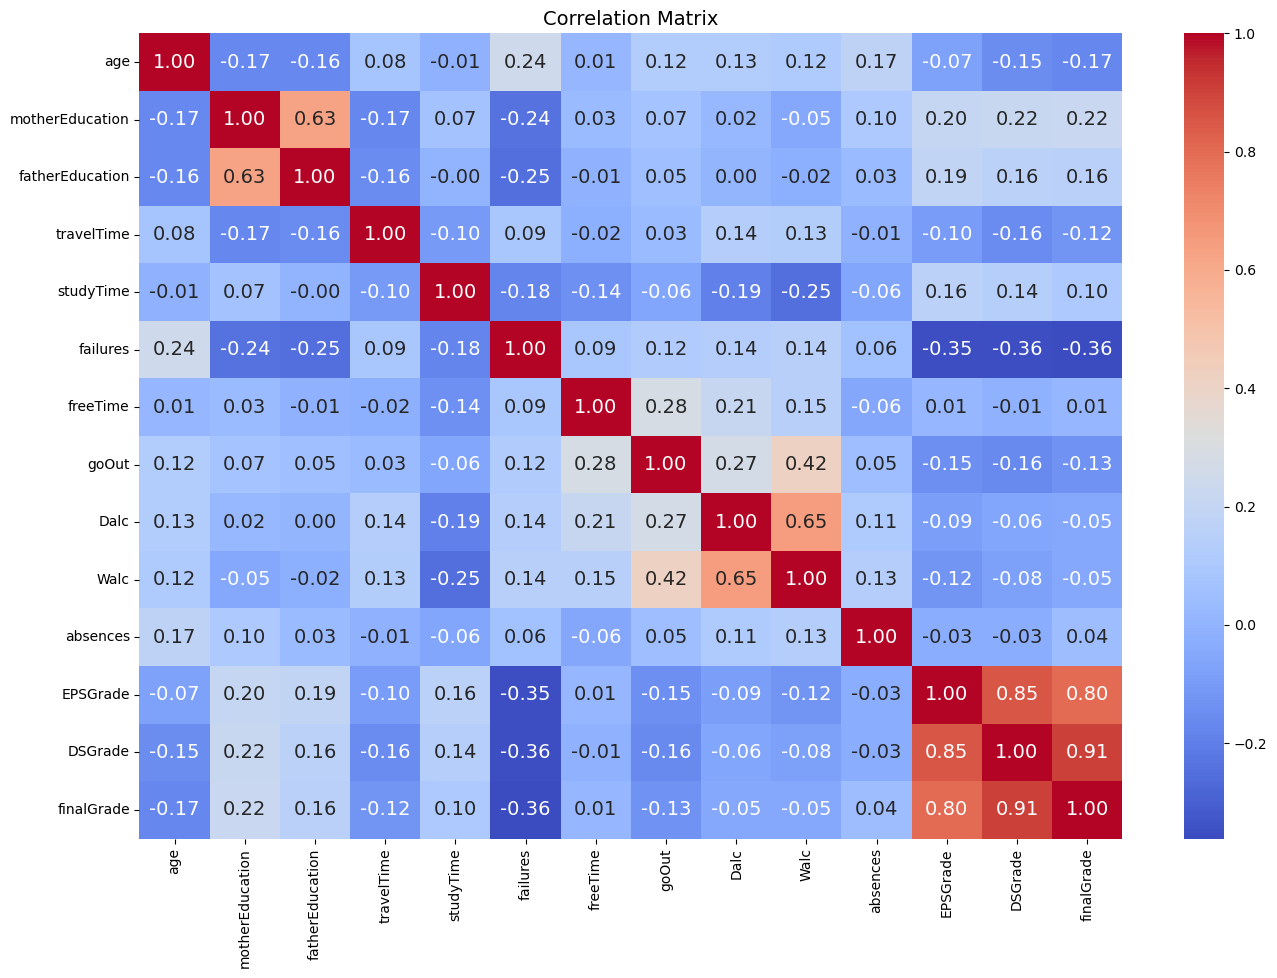

In [210]:
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## Handling Missing values :
iI n this dataset I assume that the **other** value is like the null value and in the next cells I decided How to handle null values.

Null and 'Other' Value Statistics:


Column  Null_Count  Null_Percentage  Other_Count  \
1           fatherJob           0              0.0          217   
0           motherJob           0              0.0          142   
2              reason           0              0.0           37   
3   universitySupport           0              0.0            0   
4                paid           0              0.0            0   
5              higher           0              0.0            0   
6            internet           0              0.0            0   
7            romantic           0              0.0            0   
8                 age           0              0.0            0   
9          travelTime           0              0.0            0   
10          studyTime           0              0.0            0   
11           failures           0              0.0            0   
12           absences           0              0.0            0   
13           EPSGrade           0              0.0            0   
14            DSGrade           0              0.0            0   
15         finalGrade           0              0.0            0   

    Other_Percentage  Combined_Null_Other_Percentage  
1          54.659950                       54.659950  
0          35.768262                       35.768262  
2           9.319899                        9.319899  
3           0.000000                        0.000000  
4           0.000000                        0.000000  
5           0.000000                        0.000000  
6           0.000000                        0.000000  
7           0.000000                        0.000000  
8           0.000000                        0.000000  
9           0.000000                        0.000000  
10          0.000000                        0.000000  
11          0.000000                        0.000000  
12          0.000000                        0.000000  
13          0.000000                        0.000000  
14          0.000000                        0.000000  
15          0.000000                        0.000000

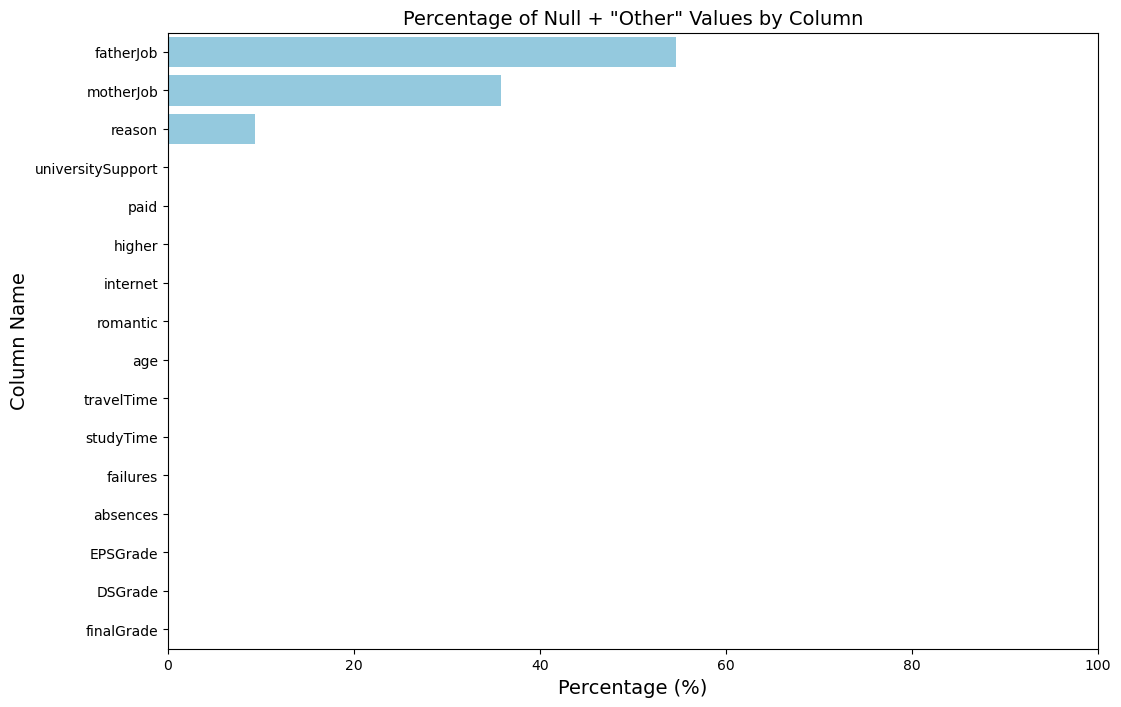

In [211]:
potential_cols = ['motherJob', 'fatherJob', 'reason', 'universitySupport', 
                 'paid', 'higher', 'internet', 'romantic', 'age', 'travelTime',
                 'studyTime', 'failures', 'absences', 'EPSGrade', 'DSGrade', 'finalGrade']

null_stats = pd.DataFrame({
    'Column': potential_cols,
    'Null_Count': [df[col].isnull().sum() if col in df.columns else 0 for col in potential_cols],
    'Other_Count': [(df[col] == 'other').sum() 
                   if col in df.columns and df[col].dtype == 'object' and 'other' in df[col].unique() 
                   else 0 for col in potential_cols],
    'Total_Count': [len(df) if col in df.columns else 0 for col in potential_cols]
})

null_stats['Null_Percentage'] = (null_stats['Null_Count'] / null_stats['Total_Count']) * 100
null_stats['Other_Percentage'] = (null_stats['Other_Count'] / null_stats['Total_Count']) * 100
null_stats['Combined_Null_Other_Percentage'] = ((null_stats['Null_Count'] + null_stats['Other_Count']) / 
                                              null_stats['Total_Count']) * 100

result = null_stats[['Column', 'Null_Count', 'Null_Percentage', 
                    'Other_Count', 'Other_Percentage',
                    'Combined_Null_Other_Percentage']].sort_values(
                    'Combined_Null_Other_Percentage', ascending=False)

print("Null and 'Other' Value Statistics:")
display(result)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Combined_Null_Other_Percentage', y='Column', data=result, color='skyblue')
plt.title('Percentage of Null + "Other" Values by Column')
plt.xlabel('Percentage (%)')
plt.ylabel('Column Name')
plt.xlim(0, 100)
plt.show()

I will drop the **fatherJob** and **motherJob** columns because the other value percentage in them is very high so filling them it is not a good idea

In [212]:

df_clean = df.copy()

df_clean = df_clean.drop(['fatherJob', 'motherJob'], axis=1)

df_clean['reason'] = df_clean['reason'].replace('other', np.nan)

X = df_clean.drop('finalGrade', axis=1)
y = df_clean['finalGrade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


cat_cols = ['reason', 'universitySupport', 'paid', 'higher', 'internet', 'romantic']
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

num_cols = ['age', 'travelTime', 'studyTime', 'failures', 'absences', 'EPSGrade', 'DSGrade']
num_imputer = SimpleImputer(strategy='median')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

For null handling(other values) I  used two strategies in here one of them is dropping the column and the other one is to use simpleimputer and I use the mod strategy for the categorical features and median for numerical features .
Other ways to handle missing values are:
- KNNImputer: KNNImputer replaces each missing value with the mean of the *k-nearest neighbors'* values for that festure.
- IterativeImputer: IterativeImputer trains a regression model per feature  to predict the misssing values based on all the other available.

Also I splited my data into train and test before using simpleImputer to avoid data leakage.

In [213]:
def validate_no_nulls(df):
    null_check = df.isnull().sum().sum()
    
    other_check = 0
    for col in df.select_dtypes(include=['object']).columns:
        if 'other' in df[col].unique():
            other_check += (df[col] == 'other').sum()
    
    na_check = df.isna().sum().sum()
    
    total_issues = null_check + other_check + na_check
    
    if total_issues == 0:
        print("✅ Validation passed - No nulls or 'other' values found")
        return True
    else:
        print(f"❌ Validation failed - Found {total_issues} issues:")
        if null_check > 0:
            print(f"- {null_check} null values")
        if other_check > 0:
            print(f"- {other_check} 'other' values")
        if na_check > 0:
            print(f"- {na_check} NA values")
        return False

print("Validating training set...")
train_valid = validate_no_nulls(X_train)

print("\nValidating test set...")
test_valid = validate_no_nulls(X_test)

Validating training set...
✅ Validation passed - No nulls or 'other' values found

Validating test set...
✅ Validation passed - No nulls or 'other' values found


In [214]:
binary_cols = ['universitySupport','sex', 'address', 'paid', 'higher', 'internet', 'romantic']
multi_cat_cols = ['reason', 'university']

label_encoders = {}
for col in binary_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le


X_train_cnb = X_train.copy()
X_test_cnb = X_test.copy()

ohe = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train[multi_cat_cols])
encoded_train = ohe.transform(X_train[multi_cat_cols])
encoded_test = ohe.transform(X_test[multi_cat_cols])

cat_cols = []
for i, col in enumerate(multi_cat_cols):
    categories = ohe.categories_[i]
    cat_cols.extend([f"{col}_{cat}" for cat in categories])

encoded_train_df = pd.DataFrame(encoded_train, columns=cat_cols, index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=cat_cols, index=X_test.index)

X_train = pd.concat([X_train.drop(columns=multi_cat_cols), encoded_train_df], axis=1)
X_test = pd.concat([X_test.drop(columns=multi_cat_cols), encoded_test_df], axis=1)


In [215]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 262 to 102
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                317 non-null    int32  
 1   age                317 non-null    float64
 2   address            317 non-null    int32  
 3   motherEducation    317 non-null    int64  
 4   fatherEducation    317 non-null    int64  
 5   travelTime         317 non-null    float64
 6   studyTime          317 non-null    float64
 7   failures           317 non-null    float64
 8   universitySupport  317 non-null    int32  
 9   paid               317 non-null    int32  
 10  higher             317 non-null    int32  
 11  internet           317 non-null    int32  
 12  romantic           317 non-null    int32  
 13  freeTime           317 non-null    int64  
 14  goOut              317 non-null    int64  
 15  Dalc               317 non-null    int64  
 16  Walc               317 non-nu

In [216]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 114 to 18
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                80 non-null     int32  
 1   age                80 non-null     float64
 2   address            80 non-null     int32  
 3   motherEducation    80 non-null     int64  
 4   fatherEducation    80 non-null     int64  
 5   travelTime         80 non-null     float64
 6   studyTime          80 non-null     float64
 7   failures           80 non-null     float64
 8   universitySupport  80 non-null     int32  
 9   paid               80 non-null     int32  
 10  higher             80 non-null     int32  
 11  internet           80 non-null     int32  
 12  romantic           80 non-null     int32  
 13  freeTime           80 non-null     int64  
 14  goOut              80 non-null     int64  
 15  Dalc               80 non-null     int64  
 16  Walc               80 non-null 

In [217]:
def classify_grade(grade):
    if grade >= 17:
        return 'A'
    elif grade >= 14:
        return 'B'
    elif grade >= 10:
        return 'C'
    else:
        return 'F'

y_train = y_train.apply(classify_grade)
y_test = y_test.apply(classify_grade)
y_train.head()


262    C
113    A
176    C
63     F
245    A
Name: finalGrade, dtype: object

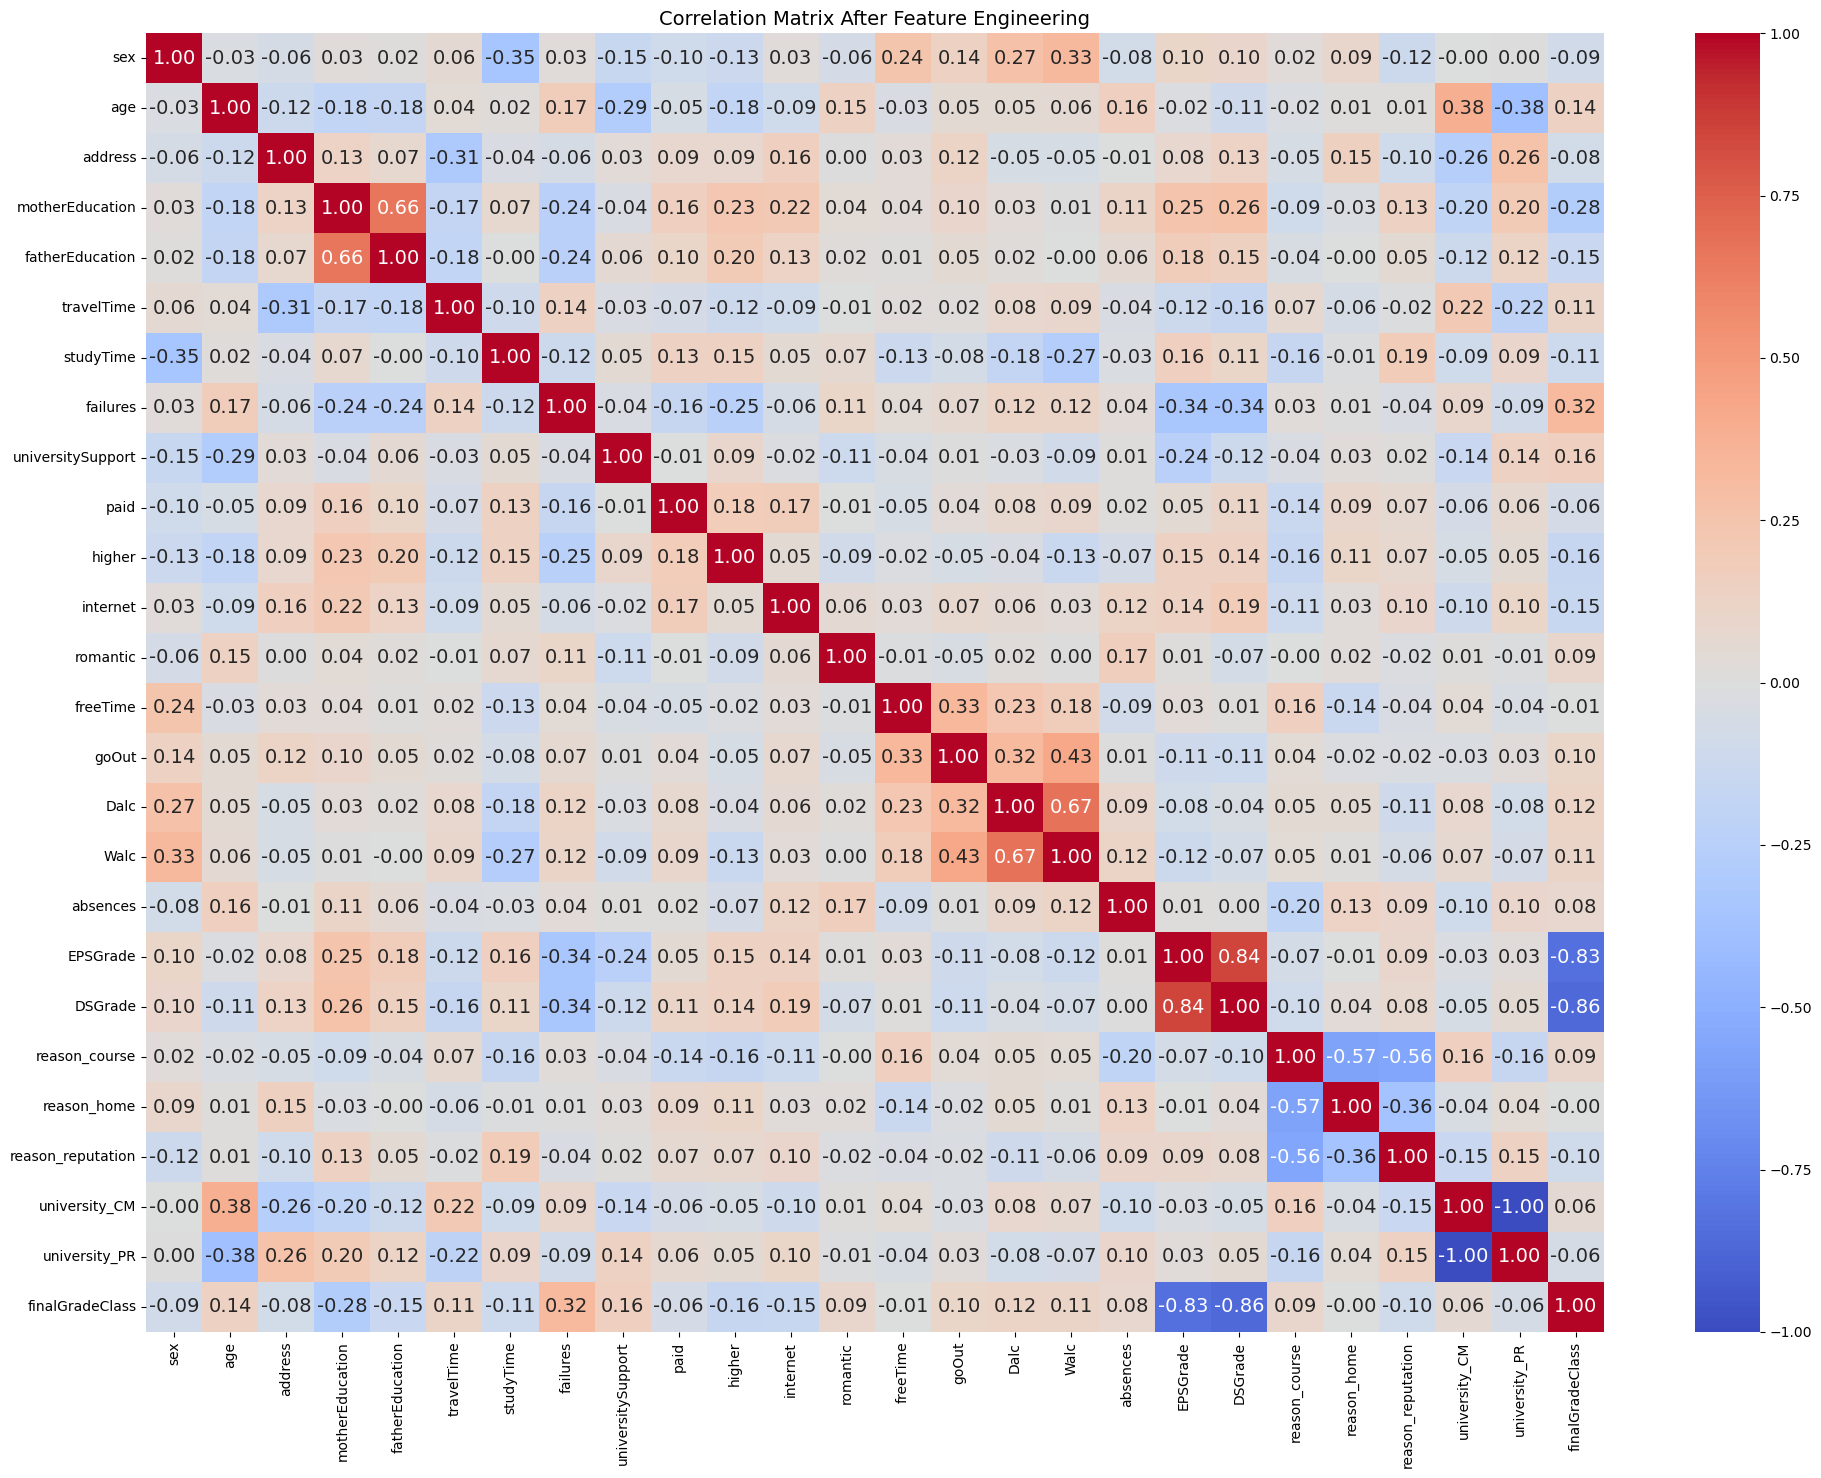

In [218]:
y_train_encoded = LabelEncoder().fit_transform(y_train)
X_corr = X_train.copy()
X_corr['finalGradeClass'] = y_train_encoded

corr_matrix = X_corr.corr(numeric_only=True)

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix After Feature Engineering")
plt.tight_layout()
plt.show()



## Scalling:
Using MinMaxScaler and the StandardScaler.I've run the models with both of scalling methods but the minmaxscalling had a better performance than the StanndardScaler.As the result for my final modelss I've prefered to use the MinMaxScaler.

In [219]:

num_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]

minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

X_train_minmax = X_train.copy()
X_test_minmax = X_test.copy()
X_train_standard = X_train.copy()
X_test_standard = X_test.copy()

X_train_minmax[num_cols] = minmax_scaler.fit_transform(X_train_minmax[num_cols])
X_test_minmax[num_cols] = minmax_scaler.transform(X_test_minmax[num_cols])

X_train_standard[num_cols] = standard_scaler.fit_transform(X_train_standard[num_cols])
X_test_standard[num_cols] = standard_scaler.transform(X_test_standard[num_cols])


## Gaussian Naive Bayse:

In [220]:
features = ['DSGrade', 'EPSGrade']
X_train_gnb = X_train[features].copy()
X_test_gnb = X_test[features].copy()

X_train_gnb = X_train_gnb.astype(float)
X_test_gnb = X_test_gnb.astype(float)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

gnb = GaussianNB()
gnb.fit(X_train_gnb, y_train_encoded)

y_pred_gnb = gnb.predict(X_test_gnb)
print("\nGaussianNB Performance (using DSGrade and EPSGrade):")
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_gnb))
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_gnb, target_names=label_encoder.classes_, zero_division=1))

metrics = {
    'micro': precision_recall_fscore_support(y_test_encoded, y_pred_gnb, average='micro'),
    'macro': precision_recall_fscore_support(y_test_encoded, y_pred_gnb, average='macro'),
    'weighted': precision_recall_fscore_support(y_test_encoded, y_pred_gnb, average='weighted')
}

print("\nDetailed Averages:")
for avg_type, (precision, recall, f1, _) in metrics.items():
    print(f"{avg_type.capitalize()} Average:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}\n")


GaussianNB Performance (using DSGrade and EPSGrade):
Confusion Matrix:
[[ 5  1  0  0]
 [ 0 14  2  0]
 [ 0  3 24  3]
 [ 0  0  1 27]]

Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.83      0.91         6
           B       0.78      0.88      0.82        16
           C       0.89      0.80      0.84        30
           F       0.90      0.96      0.93        28

    accuracy                           0.88        80
   macro avg       0.89      0.87      0.88        80
weighted avg       0.88      0.88      0.87        80


Detailed Averages:
Micro Average:
  Precision: 0.8750
  Recall:    0.8750
  F1-score:  0.8750

Macro Average:
  Precision: 0.8917
  Recall:    0.8682
  F1-score:  0.8764

Weighted Average:
  Precision: 0.8789
  Recall:    0.8750
  F1-score:  0.8745



## Categorical Naive Bayes:

In [221]:
from sklearn.naive_bayes import CategoricalNB

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label mapping:", label_mapping)

X_train_int = X_train.astype('int')
X_test_int = X_test.astype('int')
X_train_catnb = X_train_int.copy()
X_test_catnb = X_test_int.copy()

X_test_catnb['age'] = X_test_catnb['age'].clip(upper=X_train_catnb['age'].max())
X_test_catnb['EPSGrade'] = X_test_catnb['EPSGrade'].clip(lower=X_train_catnb['EPSGrade'].min())

def bin_features(df, columns, n_bins=5):
    df_binned = df.copy()
    for col in columns:
        df_binned[col] = pd.qcut(df[col], q=n_bins, labels=False, duplicates='drop')
    return df_binned

high_cardinality_cols = ['absences', 'EPSGrade', 'DSGrade']
X_train_binned = bin_features(X_train_catnb, high_cardinality_cols, n_bins=5)
X_test_binned = bin_features(X_test_catnb, high_cardinality_cols, n_bins=5)

X_train_binned = X_train_binned.astype(int)
X_test_binned = X_test_binned.astype(int)

print("Negative values in train:", (X_train_binned < 0).any().sum())
print("Negative values in test:", (X_test_binned < 0).any().sum())

for column in X_train_binned.columns:
    max_train_value = X_train_binned[column].max()
    X_test_binned[column] = X_test_binned[column].clip(upper=max_train_value)

catnb_params = {
    'alpha': [1.0, 0.5, 0.1],
    'fit_prior': [True, False]
}

catnb_search = GridSearchCV(
    CategoricalNB(),
    catnb_params,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1
)

catnb_search.fit(X_train_binned, y_train_encoded)

catnb_best = catnb_search.best_estimator_
print("✅ Best CategoricalNB Parameters:", catnb_search.best_params_)

y_pred_catnb = catnb_best.predict(X_test_binned)

print("CategoricalNB Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_catnb))
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_catnb, target_names=label_encoder.classes_, zero_division=1))

metrics = {
    'micro': precision_recall_fscore_support(y_test_encoded, y_pred_catnb, average='micro'),
    'macro': precision_recall_fscore_support(y_test_encoded, y_pred_catnb, average='macro'),
    'weighted': precision_recall_fscore_support(y_test_encoded, y_pred_catnb, average='weighted')
}

print("\nDetailed Averages:")
for avg_type, (precision, recall, f1, _) in metrics.items():
    print(f"{avg_type.capitalize()} Average:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}\n")


Label mapping: {'A': 0, 'B': 1, 'C': 2, 'F': 3}
Negative values in train: 0
Negative values in test: 0
✅ Best CategoricalNB Parameters: {'alpha': 0.5, 'fit_prior': True}
CategoricalNB Performance:
Confusion Matrix:
[[ 0  6  0  0]
 [ 0 15  1  0]
 [ 0  2 25  3]
 [ 0  0  3 25]]

Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.00      0.00         6
           B       0.65      0.94      0.77        16
           C       0.86      0.83      0.85        30
           F       0.89      0.89      0.89        28

    accuracy                           0.81        80
   macro avg       0.85      0.67      0.63        80
weighted avg       0.84      0.81      0.78        80


Detailed Averages:
Micro Average:
  Precision: 0.8125
  Recall:    0.8125
  F1-score:  0.8125

Macro Average:
  Precision: 0.6018
  Recall:    0.6659
  F1-score:  0.6274

Weighted Average:
  Precision: 0.7662
  Recall:    0.8125
  F1-score:  0.7841



c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Decision Tree:

✅ Best Decision Tree Parameters: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Performance:
[[ 4  2  0  0]
 [ 0 14  2  0]
 [ 0  0 26  4]
 [ 0  0  1 27]]
              precision    recall  f1-score   support

           A       1.00      0.67      0.80         6
           B       0.88      0.88      0.88        16
           C       0.90      0.87      0.88        30
           F       0.87      0.96      0.92        28

    accuracy                           0.89        80
   macro avg       0.91      0.84      0.87        80
weighted avg       0.89      0.89      0.89        80


Detailed Averages:
Micro Average:
  Precision: 0.8875
  Recall:    0.8875
  F1-score:  0.8875

Macro Average:
  Precision: 0.9106
  Recall:    0.8432
  F1-score:  0.8679

Weighted Average:
  Precision: 0.8910
  Recall:    0.8875
  F1-score:  0.8858



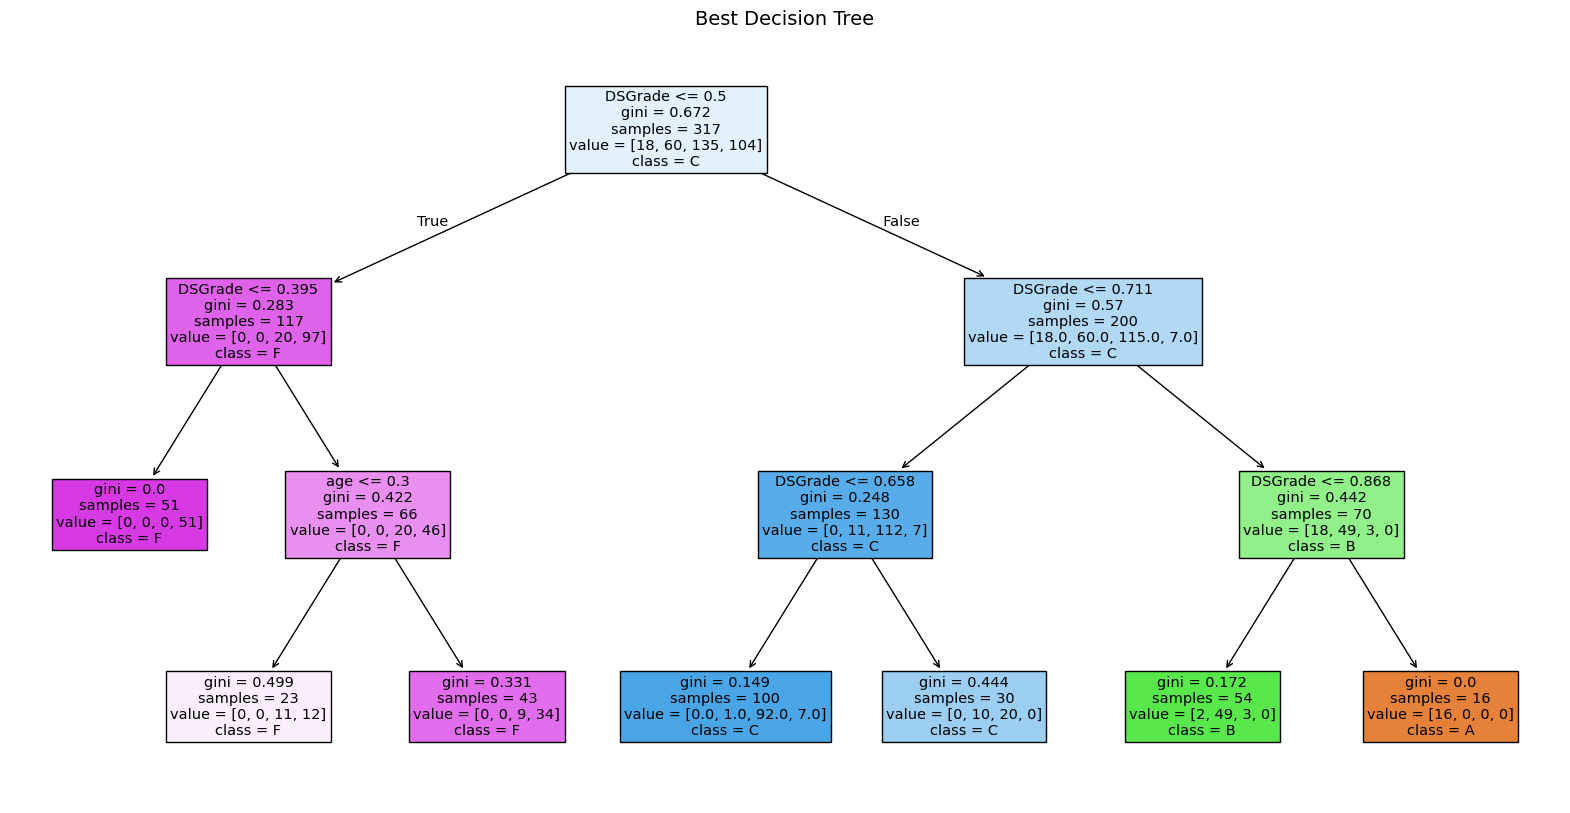

In [222]:
# dt_params = {
#     'max_depth': [3, 5, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
dt_params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

dt_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                         param_grid=dt_params,
                         scoring='f1_weighted',
                         cv=5)
dt_search.fit(X_train_minmax, y_train)
dt_best = dt_search.best_estimator_

print("✅ Best Decision Tree Parameters:", dt_search.best_params_)

y_pred_dt = dt_best.predict(X_test_minmax)
print("Decision Tree Performance:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

metrics = {
    'micro': precision_recall_fscore_support(y_test, y_pred_dt, average='micro'),
    'macro': precision_recall_fscore_support(y_test, y_pred_dt, average='macro'),
    'weighted': precision_recall_fscore_support(y_test, y_pred_dt, average='weighted')
}

print("\nDetailed Averages:")
for avg_type, (precision, recall, f1, _) in metrics.items():
    print(f"{avg_type.capitalize()} Average:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}\n")

plt.figure(figsize=(20, 10))
plot_tree(dt_best, feature_names=X_train.columns, class_names=dt_best.classes_, filled=True)
plt.title("Best Decision Tree")
plt.show()


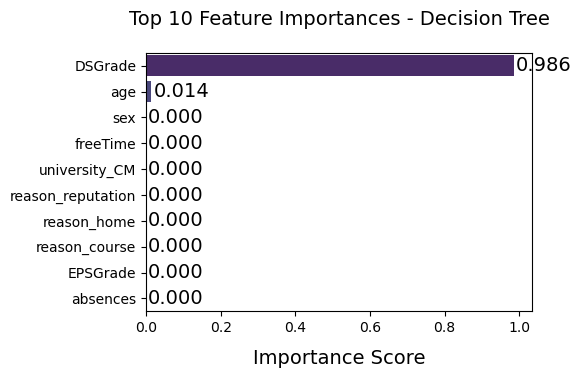

In [223]:
feature_importances = pd.DataFrame({
    'Feature': X_train_minmax.columns,
    'Importance': dt_best.feature_importances_
}).sort_values('Importance', ascending=False)

top_10_features = feature_importances.head(10)


plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x='Importance', 
    y='Feature', 
    hue='Feature', 
    data=top_10_features, 
    palette='viridis',
    legend=False,   
    dodge=False      
)

plt.title('Top 10 Feature Importances - Decision Tree', pad=20)
plt.xlabel('Importance Score', labelpad=10)
plt.ylabel('')
ax.yaxis.label.set_visible(False)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.005, 
            p.get_y() + p.get_height()/2, 
            f'{width:.3f}', 
            ha='left', 
            va='center')

plt.tight_layout()
plt.show()

## Random Forest:

In [224]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
rf = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(
    rf,
    param_distributions=rf_params,
    n_iter=20,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1,
    random_state=42
)
rf_search.fit(X_train_minmax, y_train)

rf_best = rf_search.best_estimator_
print("\n✅ Best RandomForestClassifier Parameters:", rf_search.best_params_)

y_pred_rf = rf_best.predict(X_test_minmax)
print("\nRandomForestClassifier Performance (using all features):")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_, zero_division=1))


metrics = {
    'micro': precision_recall_fscore_support(y_test, y_pred_rf, average='micro'),
    'macro': precision_recall_fscore_support(y_test, y_pred_rf, average='macro'),
    'weighted': precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')
}

print("\nDetailed Averages:")
for avg_type, (precision, recall, f1, _) in metrics.items():
    print(f"{avg_type.capitalize()} Average:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}\n")


✅ Best RandomForestClassifier Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 7}

RandomForestClassifier Performance (using all features):
Confusion Matrix:
[[ 4  2  0  0]
 [ 0 15  1  0]
 [ 0  1 26  3]
 [ 0  0  2 26]]

Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.67      0.80         6
           B       0.83      0.94      0.88        16
           C       0.90      0.87      0.88        30
           F       0.90      0.93      0.91        28

    accuracy                           0.89        80
   macro avg       0.91      0.85      0.87        80
weighted avg       0.89      0.89      0.89        80


Detailed Averages:
Micro Average:
  Precision: 0.8875
  Recall:    0.8875
  F1-score:  0.8875

Macro Average:
  Precision: 0.9066
  Recall:    0.8499
  F1-score:  0.8690

Weighted Average:
  Precision: 0.8917
  Recall:    0.8875
  F1-score:  0.8863



## XGBoost:

In [ ]:
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_search = GridSearchCV(
    xgb,
    param_grid=xgb_params,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1
)
xgb_search.fit(X_train_minmax, y_train_encoded)

xgb_best = xgb_search.best_estimator_
print("\n✅ Best XGBClassifier Parameters:", xgb_search.best_params_)

y_pred_xgb = xgb_best.predict(X_test_minmax)
print("\nXGBClassifier Performance (using all features):")
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_xgb, target_names=label_encoder.classes_, zero_division=1))

metrics = {
    'micro': precision_recall_fscore_support(y_test_encoded, y_pred_xgb, average='micro'),
    'macro': precision_recall_fscore_support(y_test_encoded, y_pred_xgb, average='macro'),
    'weighted': precision_recall_fscore_support(y_test_encoded, y_pred_xgb, average='weighted')
}

print("\nDetailed Averages:")
for avg_type, (precision, recall, f1, _) in metrics.items():
    print(f"{avg_type.capitalize()} Average:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}\n")



✅ Best XGBClassifier Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200}

XGBClassifier Performance (using all features):
Confusion Matrix:
[[ 4  2  0  0]
 [ 0 14  2  0]
 [ 0  0 26  4]
 [ 0  0  1 27]]

Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.67      0.80         6
           B       0.88      0.88      0.88        16
           C       0.90      0.87      0.88        30
           F       0.87      0.96      0.92        28

    accuracy                           0.89        80
   macro avg       0.91      0.84      0.87        80
weighted avg       0.89      0.89      0.89        80


Detailed Averages:
Micro Average:
  Precision: 0.8875
  Recall:    0.8875
  F1-score:  0.8875

Macro Average:
  Precision: 0.9106
  Recall:    0.8432
  F1-score:  0.8679

Weighted Average:
  Precision: 0.8910
  Recall:    0.8875
  F1-score:  0.8858



## Decision Tree from scratch:

In [237]:
import numpy as np
from collections import Counter

class TreeNode():
    def __init__(self, data, feature_idx, feature_val, prediction_probs, information_gain) -> None:
        self.data = data
        self.feature_idx = feature_idx
        self.feature_val = feature_val
        self.prediction_probs = prediction_probs
        self.information_gain = information_gain
        self.feature_importance = self.data.shape[0] * self.information_gain
        self.left = None
        self.right = None

    def node_def(self) -> str:
        if self.left or self.right:
            return f"NODE | InfoGain = {self.information_gain:.4f} | Split: X[{self.feature_idx}] < {self.feature_val:.2f}"
        else:
            unique_values, value_counts = np.unique(self.data[:, -1], return_counts=True)
            output = ", ".join([f"{value}->{count}" for value, count in zip(unique_values, value_counts)])            
            return f"LEAF | Label Counts: {output} | Pred Probs: {self.prediction_probs.round(3)}"


class DecisionTree():

    def __init__(self, max_depth=4, min_samples_leaf=1, min_information_gain=0.0,
                 numb_of_features_splitting=None, feature_names=None):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_information_gain = min_information_gain
        self.numb_of_features_splitting = numb_of_features_splitting
        self.feature_names = feature_names  # <-- store feature names


    def _entropy(self, class_probabilities):
        return sum([-p * np.log2(p) for p in class_probabilities if p > 0])

    def _class_probabilities(self, labels):
        total_count = len(labels)
        return [label_count / total_count for label_count in Counter(labels).values()]

    def _data_entropy(self, labels):
        return self._entropy(self._class_probabilities(labels))

    def _partition_entropy(self, subsets):
        total_count = sum(len(subset) for subset in subsets)
        return sum([self._data_entropy(subset) * (len(subset) / total_count) for subset in subsets])

    def _split(self, data, feature_idx, feature_val):
        mask = data[:, feature_idx] < feature_val
        return data[mask], data[~mask]

    def _select_features_to_use(self, data):
        feature_idx = list(range(data.shape[1] - 1))
        if self.numb_of_features_splitting == "sqrt":
            size = min(int(np.sqrt(len(feature_idx))), len(feature_idx))
            return np.random.choice(feature_idx, size=size, replace=False)
        elif self.numb_of_features_splitting == "log":
            size = min(int(np.log2(len(feature_idx))), len(feature_idx))
            return np.random.choice(feature_idx, size=size, replace=False)
        else:
            return feature_idx

    def _find_best_split(self, data):
        min_part_entropy = float("inf")
        best_split = (None, None, None, None, None)
        features = self._select_features_to_use(data)

        for idx in features:
            values = np.percentile(data[:, idx], q=[25, 50, 75])
            for val in np.unique(values):
                g1, g2 = self._split(data, idx, val)
                if len(g1) == 0 or len(g2) == 0:
                    continue
                part_entropy = self._partition_entropy([g1[:, -1], g2[:, -1]])
                if part_entropy < min_part_entropy:
                    min_part_entropy = part_entropy
                    best_split = (g1, g2, idx, val, part_entropy)

        return best_split

    def _find_label_probs(self, data):
        labels = data[:, -1].astype(int)
        total = len(labels)
        probs = np.zeros(len(self.labels_in_train), dtype=float)

        for i in labels:
            probs[i] += 1 / total

        return probs


    def _create_tree(self, data, current_depth):
        if current_depth >= self.max_depth:
            return TreeNode(data, None, None, self._find_label_probs(data), 0)

        g1, g2, idx, val, entropy = self._find_best_split(data)
        if g1 is None or g2 is None:
            return TreeNode(data, None, None, self._find_label_probs(data), 0)

        node_entropy = self._entropy(self._find_label_probs(data))
        info_gain = node_entropy - entropy
        probs = self._find_label_probs(data)
        node = TreeNode(data, idx, val, probs, info_gain)

        if len(g1) < self.min_samples_leaf or len(g2) < self.min_samples_leaf:
            return node
        if info_gain < self.min_information_gain:
            return node

        node.left = self._create_tree(g1, current_depth + 1)
        node.right = self._create_tree(g2, current_depth + 1)

        return node

    def _predict_one_sample(self, x):
        node = self.tree
        while node.left or node.right:
            if x[node.feature_idx] < node.feature_val:
                node = node.left
            else:
                node = node.right
        return node.prediction_probs

    def train(self, X_train, Y_train):
        self.labels_in_train = np.unique(Y_train)
        self.label_to_index = {label: i for i, label in enumerate(self.labels_in_train)}
        self.index_to_label = {i: label for label, i in self.label_to_index.items()}
        Y_mapped = np.array([self.label_to_index[y] for y in Y_train])

        data = np.concatenate([X_train, Y_mapped.reshape(-1, 1)], axis=1)
        self.tree = self._create_tree(data, current_depth=0)

        self.feature_importances = dict.fromkeys(range(X_train.shape[1]), 0)
        self._calculate_feature_importance(self.tree)
        total_importance = sum(self.feature_importances.values())
        if total_importance > 0:
            self.feature_importances = {k: v / total_importance for k, v in self.feature_importances.items()}

    def predict_proba(self, X):
        return np.apply_along_axis(self._predict_one_sample, 1, X)

    def predict(self, X):
        probs = self.predict_proba(X)
        indices = np.argmax(probs, axis=1)
        return np.array([self.index_to_label[i] for i in indices])

    def evaluate_accuracy(self, X_test, y_test):
        preds = self.predict(X_test)
        return np.mean(preds == y_test)

    def _print_recursive(self, node, level=0):
        if node is not None:
            self._print_recursive(node.left, level + 1)
            print('    ' * level + '-> ' + node.node_def())
            self._print_recursive(node.right, level + 1)

    def print_tree(self):
        self._print_recursive(self.tree)

    def _calculate_feature_importance(self, node):
        if node is not None and node.feature_idx is not None:
            self.feature_importances[node.feature_idx] += node.feature_importance
            self._calculate_feature_importance(node.left)
            self._calculate_feature_importance(node.right)

    def print_feature_importance(self):
        print("Feature Importances:")
        for idx, importance in sorted(self.feature_importances.items(), key=lambda x: -x[1]):
            name = self.feature_names[idx] if self.feature_names else f"Feature {idx}"
            print(f"  {name}: {importance:.4f}")



In [238]:
feature_names = X_train.columns.tolist()
tree = DecisionTree(max_depth=4, feature_names=feature_names)
tree.train(X_train_minmax, y_train)

tree.print_tree()

y_pred_dt_sc = tree.predict(X_test_minmax)

print("Scratch Decision Tree Performance:")
print(confusion_matrix(y_test, y_pred_dt_sc))
print(classification_report(y_test, y_pred_dt_sc))

metrics = {
    'micro': precision_recall_fscore_support(y_test, y_pred_dt_sc, average='micro'),
    'macro': precision_recall_fscore_support(y_test, y_pred_dt_sc, average='macro'),
    'weighted': precision_recall_fscore_support(y_test, y_pred_dt_sc, average='weighted')
}

print("\nDetailed Averages:")
for avg_type, (precision, recall, f1, _) in metrics.items():
    print(f"{avg_type.capitalize()} Average:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}\n")


            -> LEAF | Label Counts: 3.0->51 | Pred Probs: [0. 0. 0. 1.]
        -> NODE | InfoGain = 0.1003 | Split: X[19] < 0.42
                -> LEAF | Label Counts: 2.0->3, 3.0->4 | Pred Probs: [0.    0.    0.429 0.571]
            -> NODE | InfoGain = 0.1296 | Split: X[1] < 0.40
                -> LEAF | Label Counts: 2.0->1, 3.0->14 | Pred Probs: [0.    0.    0.067 0.933]
    -> NODE | InfoGain = 0.3650 | Split: X[19] < 0.47
                -> LEAF | Label Counts: 3.0->5 | Pred Probs: [0. 0. 0. 1.]
            -> NODE | InfoGain = 0.0800 | Split: X[18] < 0.27
                -> LEAF | Label Counts: 2.0->16, 3.0->23 | Pred Probs: [0.   0.   0.41 0.59]
        -> NODE | InfoGain = 0.2586 | Split: X[19] < 0.53
                -> LEAF | Label Counts: 2.0->35, 3.0->7 | Pred Probs: [0.    0.    0.833 0.167]
            -> NODE | InfoGain = 0.0998 | Split: X[18] < 0.47
                -> LEAF | Label Counts: 1.0->1, 2.0->57 | Pred Probs: [0.    0.017 0.983 0.   ]
-> NODE | InfoGain = 0

In [239]:
tree.print_feature_importance()


Feature Importances:
  DSGrade: 0.9259
  EPSGrade: 0.0321
  Walc: 0.0155
  reason_course: 0.0117
  paid: 0.0080
  age: 0.0068
  address: 0.0000
  motherEducation: 0.0000
  fatherEducation: 0.0000
  travelTime: 0.0000
  studyTime: 0.0000
  failures: 0.0000
  universitySupport: 0.0000
  higher: 0.0000
  internet: 0.0000
  romantic: 0.0000
  freeTime: 0.0000
  goOut: 0.0000
  Dalc: 0.0000
  absences: 0.0000
  reason_home: 0.0000
  reason_reputation: 0.0000
  university_CM: 0.0000
  university_PR: 0.0000
  sex: -0.0000
